<h1> Аналитика в авиакомпании</h1>





<h2>Содержание:</h2>

1. [Загрузка и изучение данных](#res)
2. [Проверка типов данных на корректность](#proverka)
3. [Выбр топ-10 городов по количеству рейсов;](#poisktop)
4. [Построение графиков](#plot)
   4.1 [Модель самолетов и количество рейсов](#modelplot)
   4.2 [Город и количество рейсов](#gorodplot)
   4.3 [Топ-10 городов и количество рейсов;](#topplot)
5. [Вывод](#vivod)

<H2>Описание данных</H2>

<h3>База данных об авиаперевозках:</h3>
**Таблица aircrafts — информация об самолётах:**<br>
aircraft_code — код модели самолёта<br>
model — модель самолёта<br>
range — количество самолётов<br>

**Таблица flights — информация о рейсах:**<br>
flight_id — уникальный идентификатор рейса<br>
departure_airport — аэропорт вылета<br>
departure_time — дата и время вылета<br>
arrival_airport — аэропорт прилёта<br>
arrival_time — дата и время прилёта<br>
aircraft_code – id самолёта<br>


<a id="res"><h3>Загрузка и изучение данных</h3></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
flights = pd.read_csv('query_1.csv')
aircrafts = pd.read_csv('query.csv')

In [3]:
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
aircrafts.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [6]:
#(flights
#           .style.set_caption('Данные по количеству совершенных полетов каждой моделью самолета')
#)

In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [9]:
#flights.duplicated().sum()

In [10]:
#flights.isnull().sum()

<a id="proverka"><h3>Проверка типов данных на корректность</h3></a>

In [11]:
#округлим количетво полетов и заменим на int
flights['average_flights'] = flights['average_flights'].apply(np.ceil).astype('int')
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             101 non-null    object
 1   average_flights  101 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.3+ KB


In [12]:
flights


,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,3
3,Архангельск,6
4,Астрахань,3
...,...,...
96,Чита,2
97,Элиста,5
98,Южно-Сахалинск,5
99,Якутск,3


<a id="poisktop"><h3>Выбр топ-10 городов по количеству рейсов</h3><a>

In [13]:
# Отсортируем данные по количеству полетов и выведеи top10
flights = flights.sort_values(by='average_flights', ascending=False).reset_index(drop=True)
top_flights = flights.head(10)
top_flights

,city,average_flights
0,Москва,130
1,Санкт-Петербург,32
2,Новосибирск,18
3,Красноярск,12
4,Екатеринбург,12
5,Пермь,11
6,Ростов-на-Дону,11
7,Брянск,10
8,Ульяновск,10
9,Сочи,10


<a id="plot"><h3>Построение графиков</h3><a>

<function matplotlib.pyplot.show(close=None, block=None)>

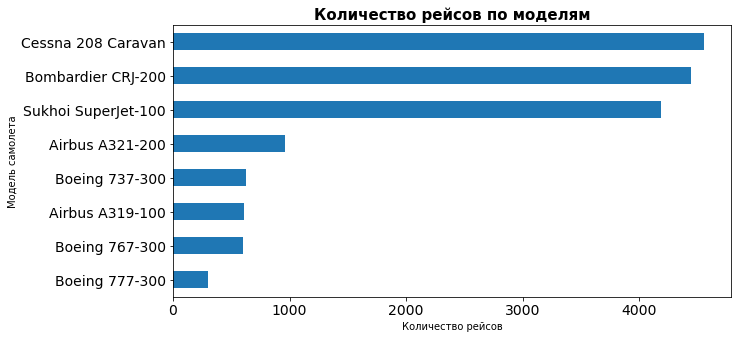

In [14]:
# отсортируем таблцу aircrafts и посторим график количество рейсов для каждой модели самолета  
(aircrafts
        .sort_values(by='flights_amount', ascending=True)    
        .plot(kind='barh', x="model", y="flights_amount",
            figsize=(10,5), fontsize=14,
            legend=False)
    )
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета')
plt.title('Количество рейсов по моделям', fontsize=15, fontweight='bold')
plt.show

**Вывод**<br>
Топ-3 модели по количеству рейсов выполняют 70 процентов перелетов

<function matplotlib.pyplot.show(close=None, block=None)>

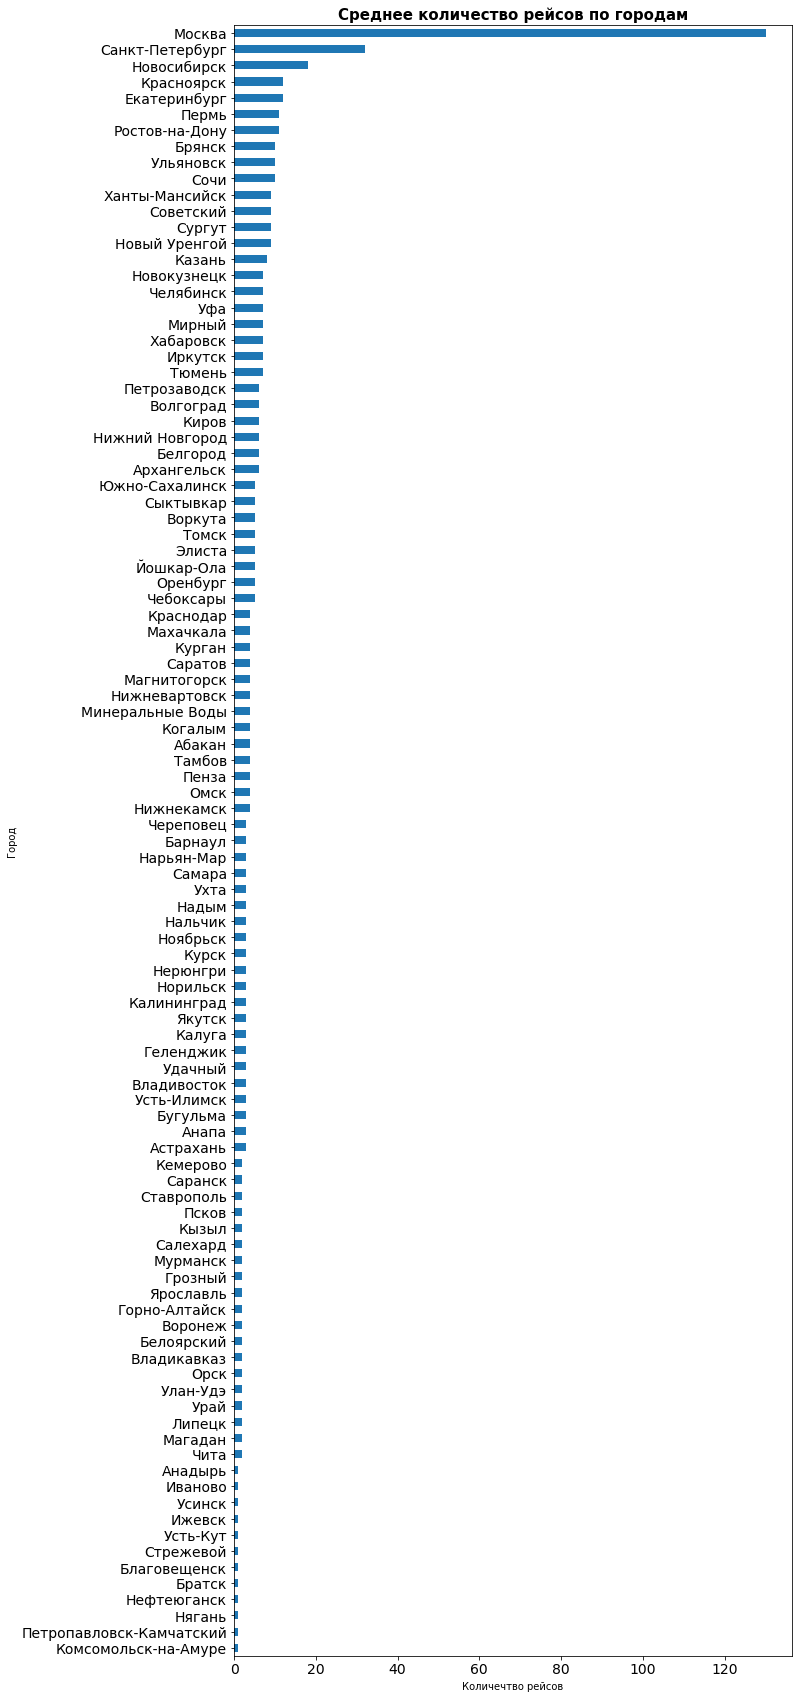

In [15]:
# отсортируем таблицу flights и посмотрим среднее количество рейсов для каждого города
(flights
        .sort_values(by='average_flights', ascending=True)
        .plot(kind='barh', x='city', y='average_flights',
            figsize=(10, 30), fontsize=14,
            legend=False)
 )
plt.xlabel('Количечтво рейсов')
plt.ylabel('Город')
plt.title('Среднее количество рейсов по городам', fontsize=15, fontweight='bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

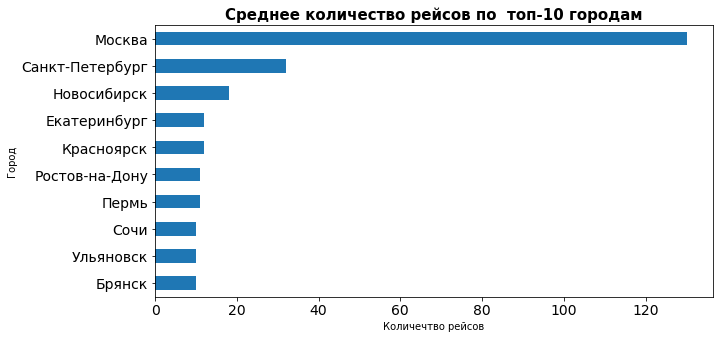

In [16]:
# оставим топ-10 городов
(top_flights
        .sort_values(by='average_flights', ascending=True)
        .plot(kind='barh', x='city', y='average_flights',
            figsize=(10, 5), fontsize=14,
            legend=False)
 )
plt.xlabel('Количечтво рейсов')
plt.ylabel('Город')
plt.title('Среднее количество рейсов по  топ-10 городам', fontsize=15, fontweight='bold')
plt.show

**Вывод:**<br>
Москва, ожидаемо, принимает большие объемы. 

<h3>Общий вывод</h3>
Основную часть всех рейсов выполняется на 3-х моделях самолетов : Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100;<br>
Первая тройка городов по количеству рейсов - Москва, Санкт-Петербург и Новосибирск.<br>
